# Toy model for network curvature

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci
import time
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

Create a random graph using stochasic block modeling with four communities:

In [2]:
sizes = [25, 25, 25,30]
probs = [[0.7, 0.05, 0.02,0.1], [0.05, 0.5, 0.07,0.03], [0.02, 0.07, 0.60,0.02],[0.1, 0.03, 0.02, 0.7]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
G.remove_edges_from(nx.selfloop_edges(G))

Plot graph in spring layout:

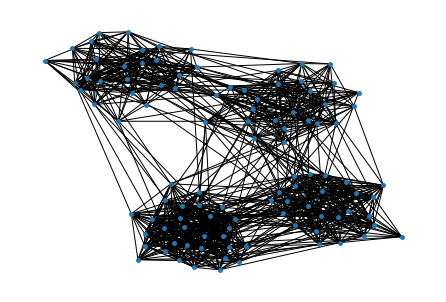

In [3]:
my_pos = nx.spring_layout(G, seed = 32)
nx.draw(G, my_pos, node_size=15)

Compute betweenness and network curvatures of the graph:

In [4]:
print("\n===== Compute Betweenness Centrality of the given graph G =====")
ebc = nx.edge_betweenness_centrality(G, weight="weight")
nbc = nx.betweenness_centrality(G, weight="weight")
print("\n===== Compute the Forman-Ricci curvature of the given graph G =====")
frc = FormanRicci(G, verbose="INFO")
frc.compute_ricci_curvature()
print("\n===== Compute the Ollivier-Ricci curvature of the given graph G =====")
orc = OllivierRicci(G, alpha=0.5, verbose="TRACE", proc=1, method="OTD")
orc.compute_ricci_curvature()

INFO:Edge weight not detected in graph, use "weight" as default edge weight.
TRACE:Number of nodes: 105
TRACE:Number of edges: 1011
TRACE:Start to compute all pair shortest path.
TRACE:0.003446 secs for all pair by NetworKit.



===== Compute Betweenness Centrality of the given graph G =====

===== Compute the Forman-Ricci curvature of the given graph G =====
Forman curvature (augmented) computation done.

===== Compute the Ollivier-Ricci curvature of the given graph G =====


INFO:0.140591 secs for Ricci curvature computation.


### Plot graph with colored edges

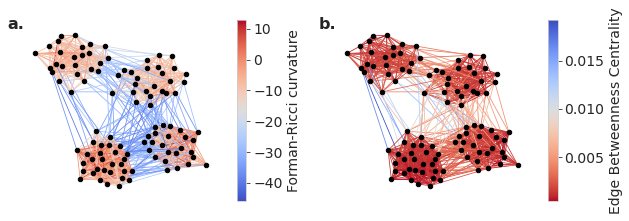

In [5]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(9, 3))
# Froman curvature
ax = plt.subplot(121)
colors = [frc.G[u][v]['formanCurvature'] for u, v in orc.G.edges]
vmin = min(colors)
vmax = max(colors)
# vmin = -30
# vmax = 10

cmap = cm.coolwarm
nx.draw(G, pos=my_pos, edge_color=colors, edge_cmap=cmap, vmin=vmin,
        vmax=vmax, width=.8, node_size=20, node_color='k')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = plt.colorbar(sm, label='Forman-Ricci curvature')
ax.text(-0.05, 0.95, f"a.", transform=ax.transAxes, size=16, weight='bold')

# Betweenness centrality
ax = plt.subplot(122)
colors = list(ebc.values())
vmin = min(colors)
vmax = max(colors)
# vmin = 0.04
# vmax = 0.05
cmap = cm.coolwarm_r
nx.draw(G, pos=my_pos, edge_color=colors, edge_cmap=cmap, vmin=vmin,
        vmax=vmax, width=.8, node_size=20, node_color='k')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = plt.colorbar(sm, label='Edge Betweenness Centrality')
ax.text(-0.05, 0.95, f"b.", transform=ax.transAxes, size=16, weight='bold')
plt.tight_layout()


### Distribution of forman, ollivier and betweenness

Text(0.5, 0, 'Betweeness')

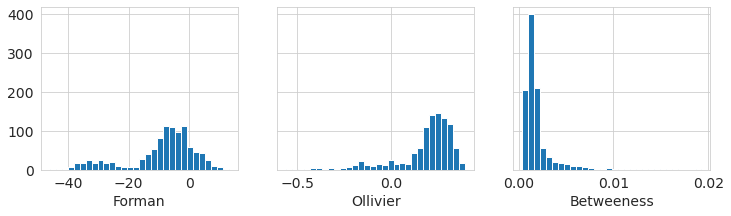

In [6]:
fig, axs = plt.subplots(1,3, figsize=(12,3), sharey=True)
# forman
_ = axs[0].hist([frc.G[u][v]['formanCurvature'] for u,v in orc.G.edges],bins=30)
axs[0].set_xlabel('Forman')
_ = axs[1].hist([orc.G[u][v]['ricciCurvature'] for u,v in orc.G.edges],bins=30)
axs[1].set_xlabel('Ollivier')
_ = axs[2].hist(list(ebc.values()),bins=30)
axs[2].set_xlabel('Betweeness')